**CNN for MNIST classification**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the input data to be 4D (batch_size, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes (0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


11490434/11490434 [==============================] - 2s 0us/step



Epoch 1/5


844/844 [==============================] - 22s 23ms/step - loss: 0.1986 - accuracy: 0.9391 - val_loss: 0.0560 - val_accuracy: 0.9850
Epoch 2/5
844/844 [==============================] - 20s 24ms/step - loss: 0.0526 - accuracy: 0.9838 - val_loss: 0.0366 - val_accuracy: 0.9893
Epoch 3/5
844/844 [==============================] - 22s 26ms/step - loss: 0.0380 - accuracy: 0.9878 - val_loss: 0.0373 - val_accuracy: 0.9892
Epoch 4/5
844/844 [==============================] - 25s 29ms/step - loss: 0.0293 - accuracy: 0.9904 - val_loss: 0.0346 - val_accuracy: 0.9900
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0319 - accuracy: 0.9903
Test accuracy: 0.9902999997138977


313/313 [==============================] - 2s 5ms/step


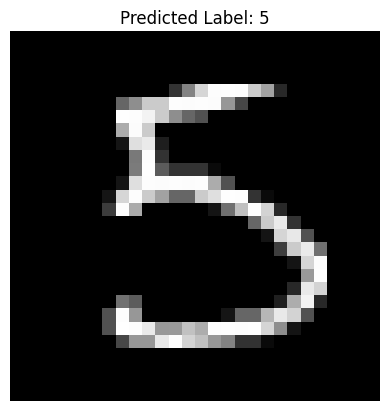

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Choose an index from the test set
index = 15  # You can choose any index you want

# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test / 255.0
x_test = x_test.reshape(-1, 28, 28, 1)

# Make predictions on the test set
predictions = model.predict(x_test)

# Get the predicted label for the chosen index
predicted_label = np.argmax(predictions[index])

# Display the test image
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()
